In [96]:
import matplotlib.pyplot as plt
import numpy as np 
import pickle


In [97]:
#Cool Off-White Style I found online
off_white_style = {
    # Figure
    "figure.facecolor": "#fefcf8",   # off-white background
    "axes.facecolor": "#fefcf8",
    "savefig.facecolor": "#fefcf8",
    
    # Axes
    "axes.edgecolor": "#dcdcdc",     # soft gray axes
    "axes.labelcolor": "#333333",    # dark text
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    
    # Grid
    "grid.color": "#e0e0e0",
    "grid.linestyle": "--",
    "grid.linewidth": 0.8,
    "axes.grid": True,
    
    # Ticks
    "xtick.color": "#555555",
    "ytick.color": "#555555",
    
    # Lines
    "lines.linewidth": 2.0,
    
    # Fonts
    "font.family": "sans-serif",
    "font.sans-serif": ["Arial", "DejaVu Sans"],
    
    # Legend
    "legend.frameon": False,
    "legend.fontsize": 12,
}

# Apply style
plt.rcParams.update(off_white_style)


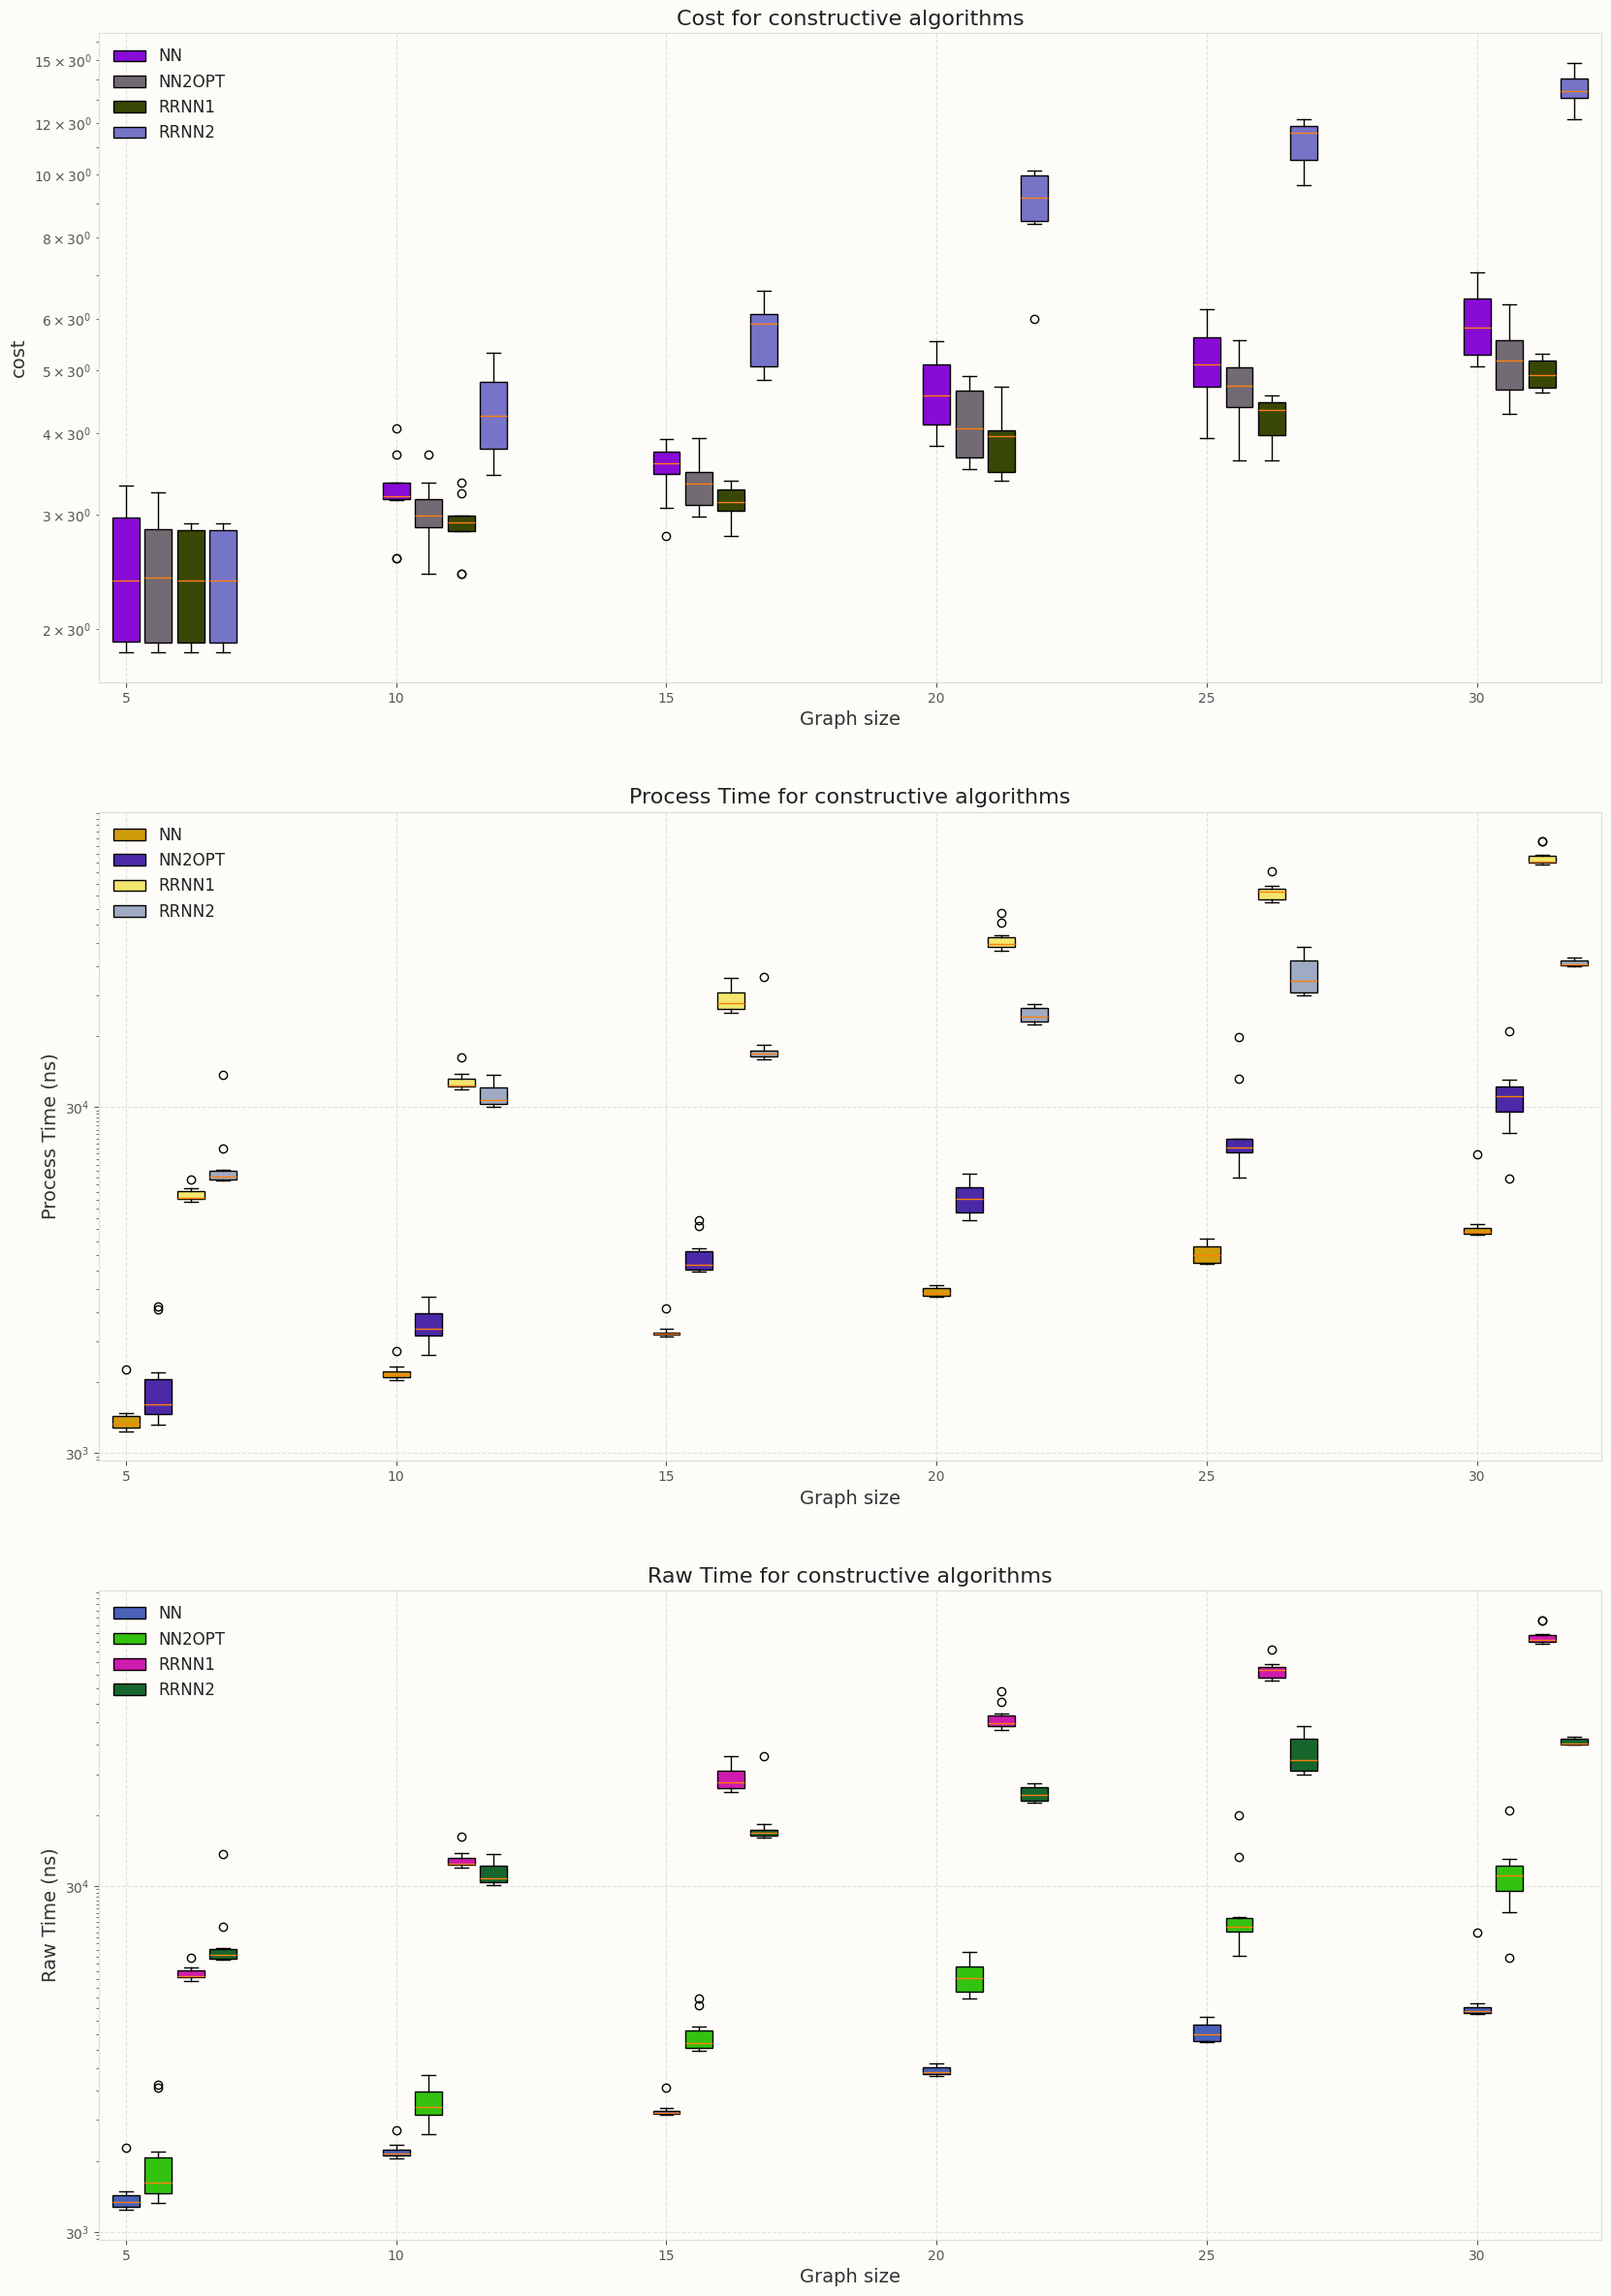

In [98]:
#NNPlot

with open("../data/nn.pkl", "rb") as f:
    data = pickle.load(f)

plt.figure(figsize = [20, 40])
x = len(data); y = 1
idx = 1 

ucities = np.array(sorted(np.unique(data['sizes'])))

width = 0.5

for measure in data.keys():
    if measure != 'sizes':
        plt.subplot(x, y, idx)
        title = measure[0].upper() + measure[1:]
        plt.title(f"{title} for constructive algorithms")
        offset = 0

        for alg in data[measure].keys():

            #Formatting for box plot
            d = data[measure][alg]
            plotd = []
            for u in ucities:
                plotd.append([ x for x, c in zip(d, data['sizes']) if c == u ])
            plt.boxplot(plotd, positions = ucities + offset, widths = width, label = alg, 
                        patch_artist=True, boxprops=dict(facecolor = np.random.rand(3,)))

            offset += width + 0.1

        plt.xticks(ucities)
        plt.yscale("log", base = 30)
        plt.xlabel("Graph size")
        plt.ylabel(measure)
        if "time" in measure.lower():
            plt.ylabel(f"{measure} (ns)")
        plt.legend()
        idx += 1

plt.show()

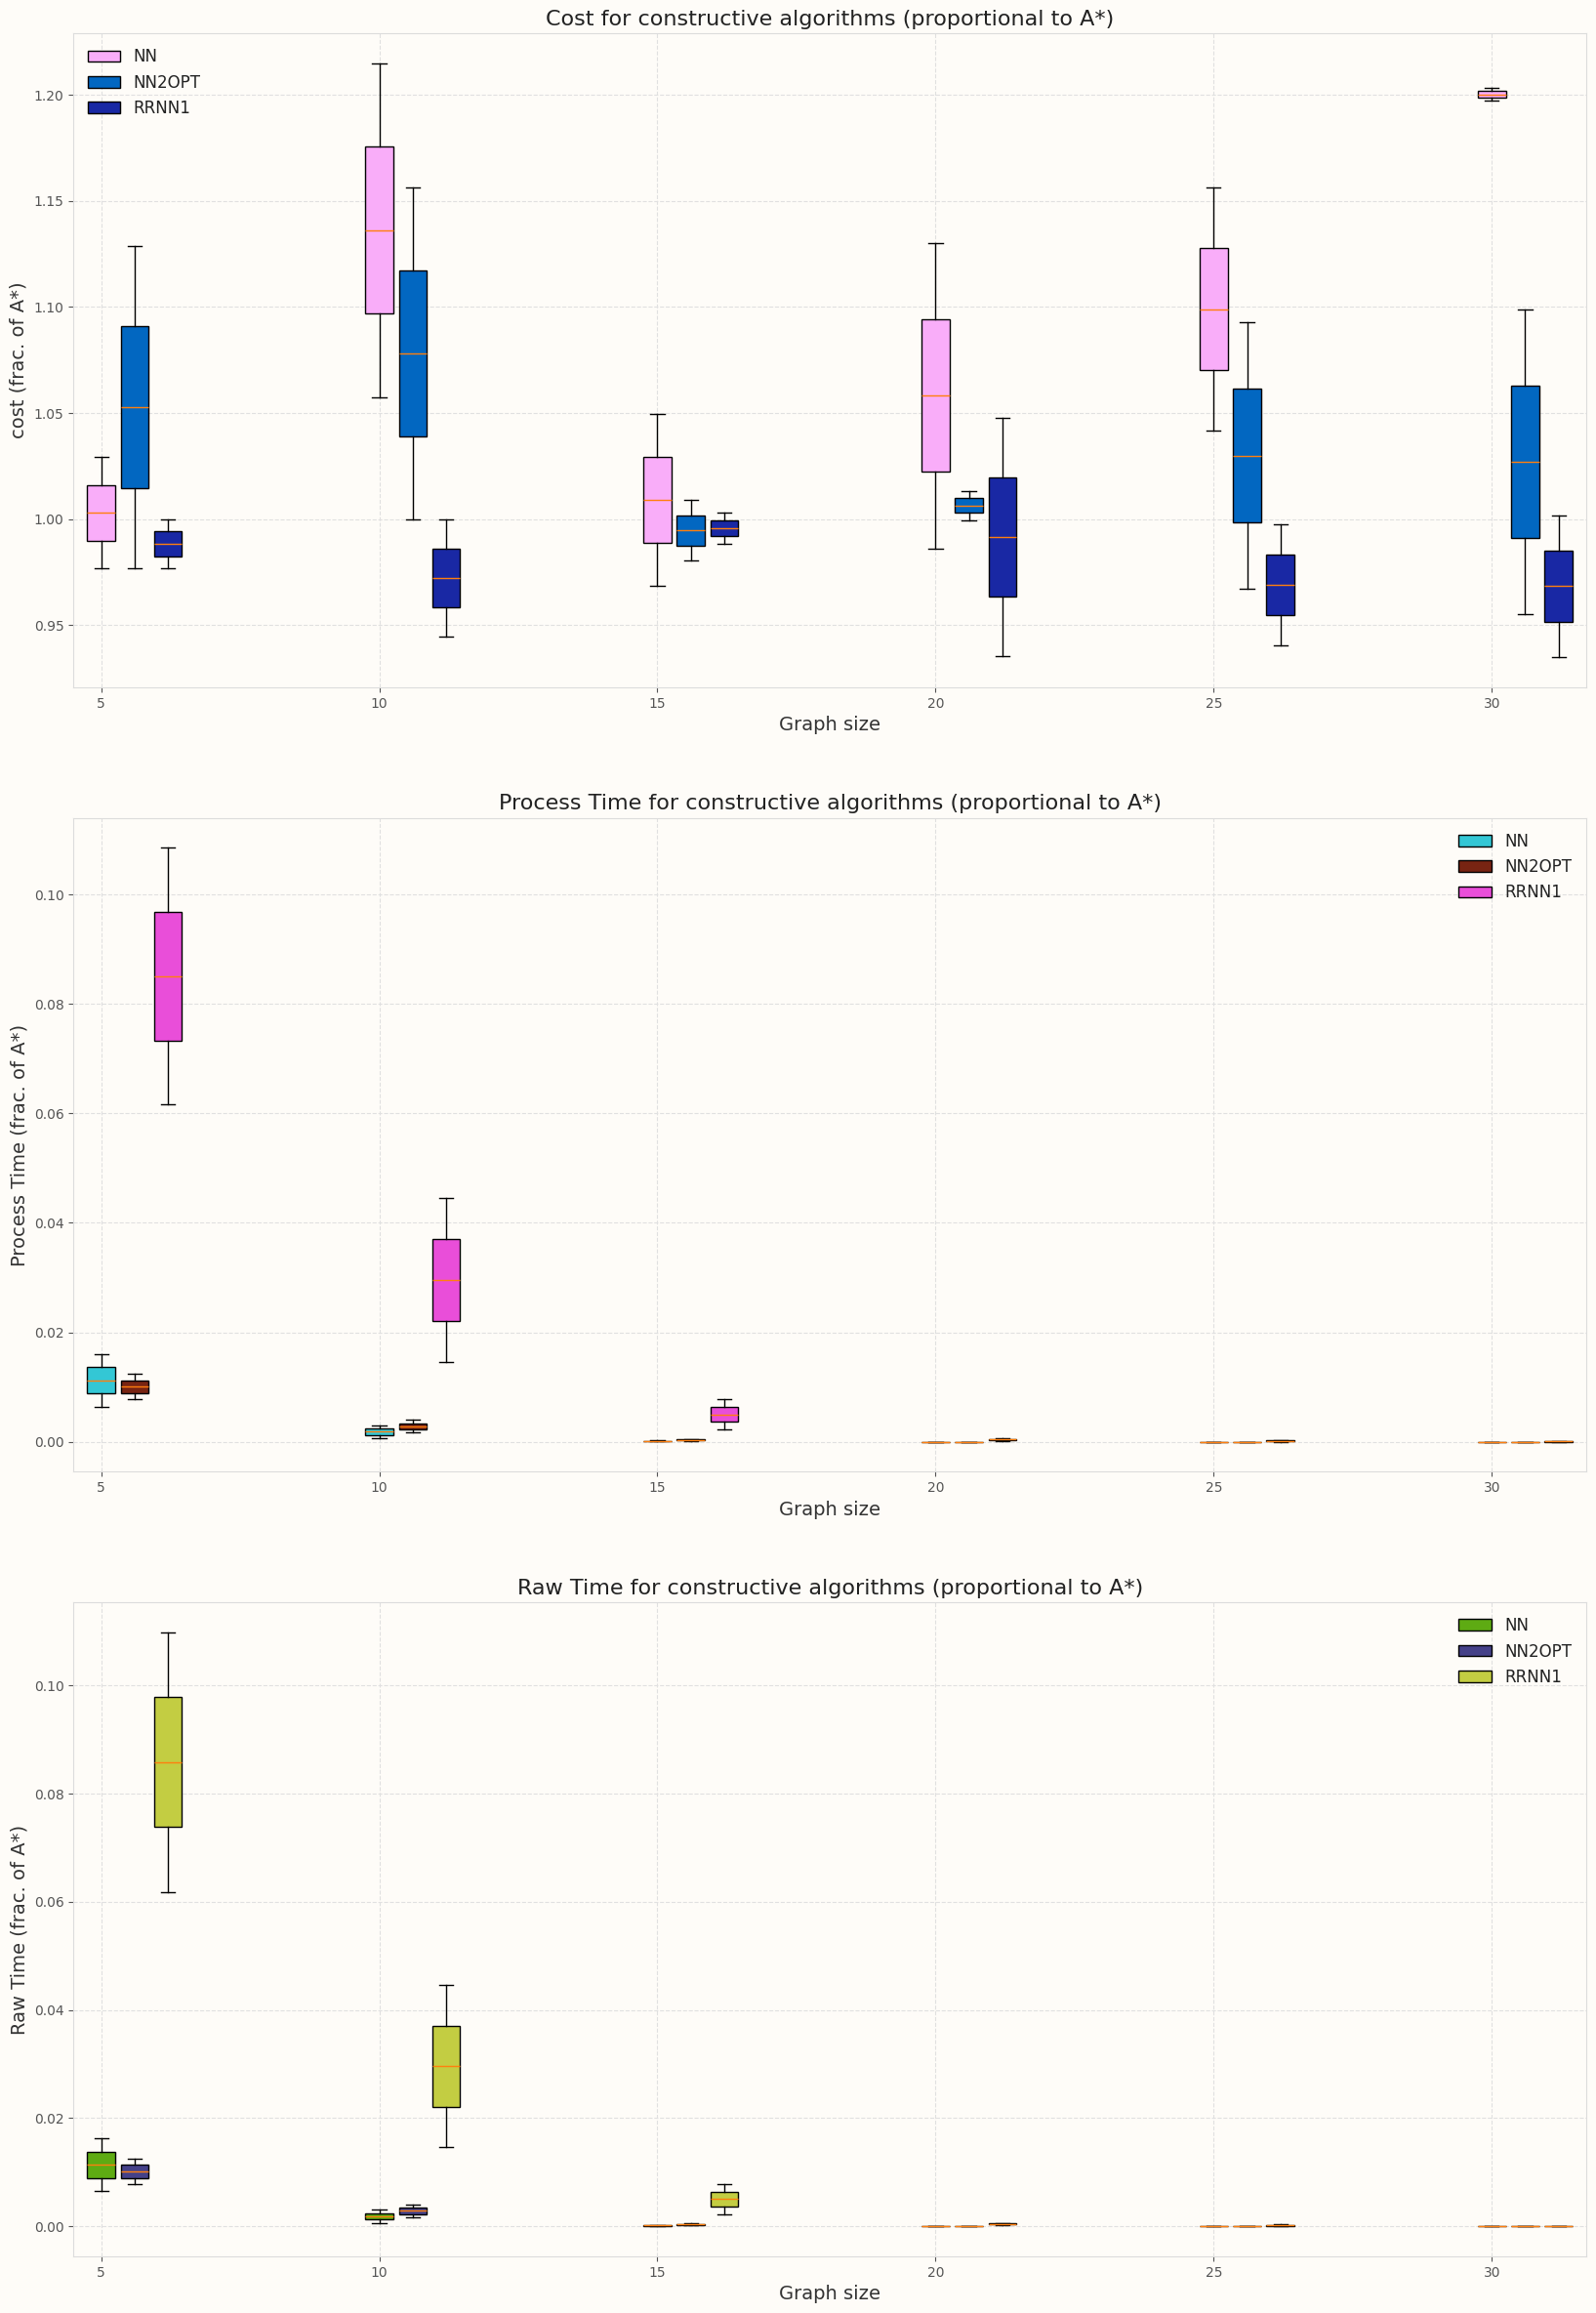

In [99]:
#NNPlot weighted by Astar
#Switched paths so keep i mind

with open("../data/nnastar.pkl", "rb") as f:
    data = pickle.load(f)

with open("../data/astarlone.pkl", "rb") as f:
    (acpu, araw, acost, apath, uniq_cities) = pickle.load(f)
    apkg = {
        "cost" : np.array(acost), "Process Time" : np.array(acpu), "Raw Time" : np.array(araw)
    }


plt.figure(figsize = [20, 40])
x = len(data); y = 1
idx = 1 

ucities = np.array(sorted(np.unique(data['sizes'])))

width = 0.5

for measure in data.keys():
    if measure != 'sizes':
        plt.subplot(x, y, idx)
        title = measure[0].upper() + measure[1:]
        plt.title(f"{title} for constructive algorithms (proportional to A*)")
        offset = 0

        for alg in data[measure].keys():

            #Formatting for box plot
            d = data[measure][alg]
            plotd = []
            for u in ucities:
                ppc = np.array([ x for x, c in zip(d, data['sizes']) if c == u ], dtype = 'float')
                ppc /= np.array([ x for x, c in zip(apkg[measure], data['sizes']) if c == u ])
                plotd.append(ppc)
            plt.boxplot(plotd, positions = ucities + offset, widths = width, label = alg, 
                        patch_artist=True, boxprops=dict(facecolor = np.random.rand(3,)))

            offset += width + 0.1

        plt.xticks(ucities)
        #plt.yscale("log", base = 30)
        plt.xlabel("Graph size")
        plt.ylabel(measure + " (frac. of A*)")
        plt.legend()
        idx += 1

plt.show()

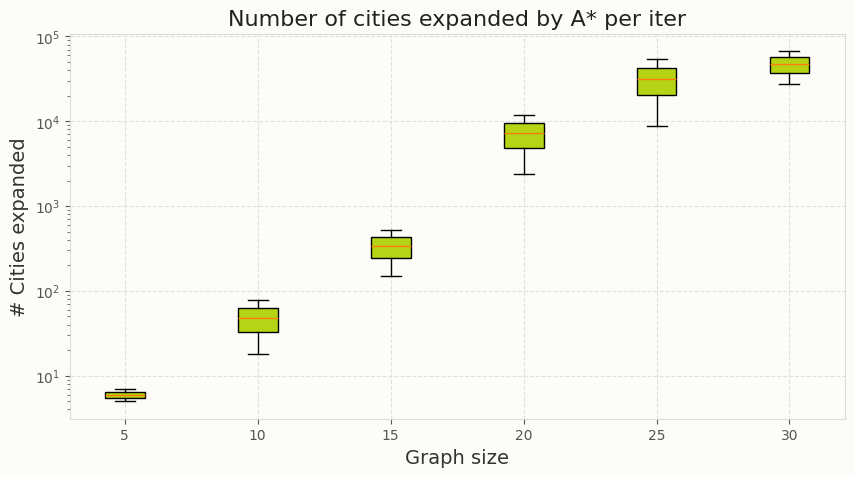

In [100]:
#Astar unique cities (expanded) plot

uniq_cities
x, y = [], []
for v in sorted(list(uniq_cities.keys())):
    x.append(v)
    y.append(list(uniq_cities[v]))

plt.figure(figsize = [10, 5])
plt.boxplot(y, positions = x, widths = 1.5, label = alg, 
            patch_artist=True, boxprops=dict(facecolor = np.random.rand(3,)))
plt.xticks(x)
plt.yscale("log", base = 10)
plt.title("Number of cities expanded by A* per iter")
plt.xlabel("Graph size")
plt.ylabel("# Cities expanded")

plt.show()

In [101]:
#Grad

with open("../data/grad.pkl", "rb") as f:
    data = pickle.load(f)

data.keys()

dict_keys(['argset', 'cost', 'Process Time', 'Raw Time', 'sizes', 'iterdata'])

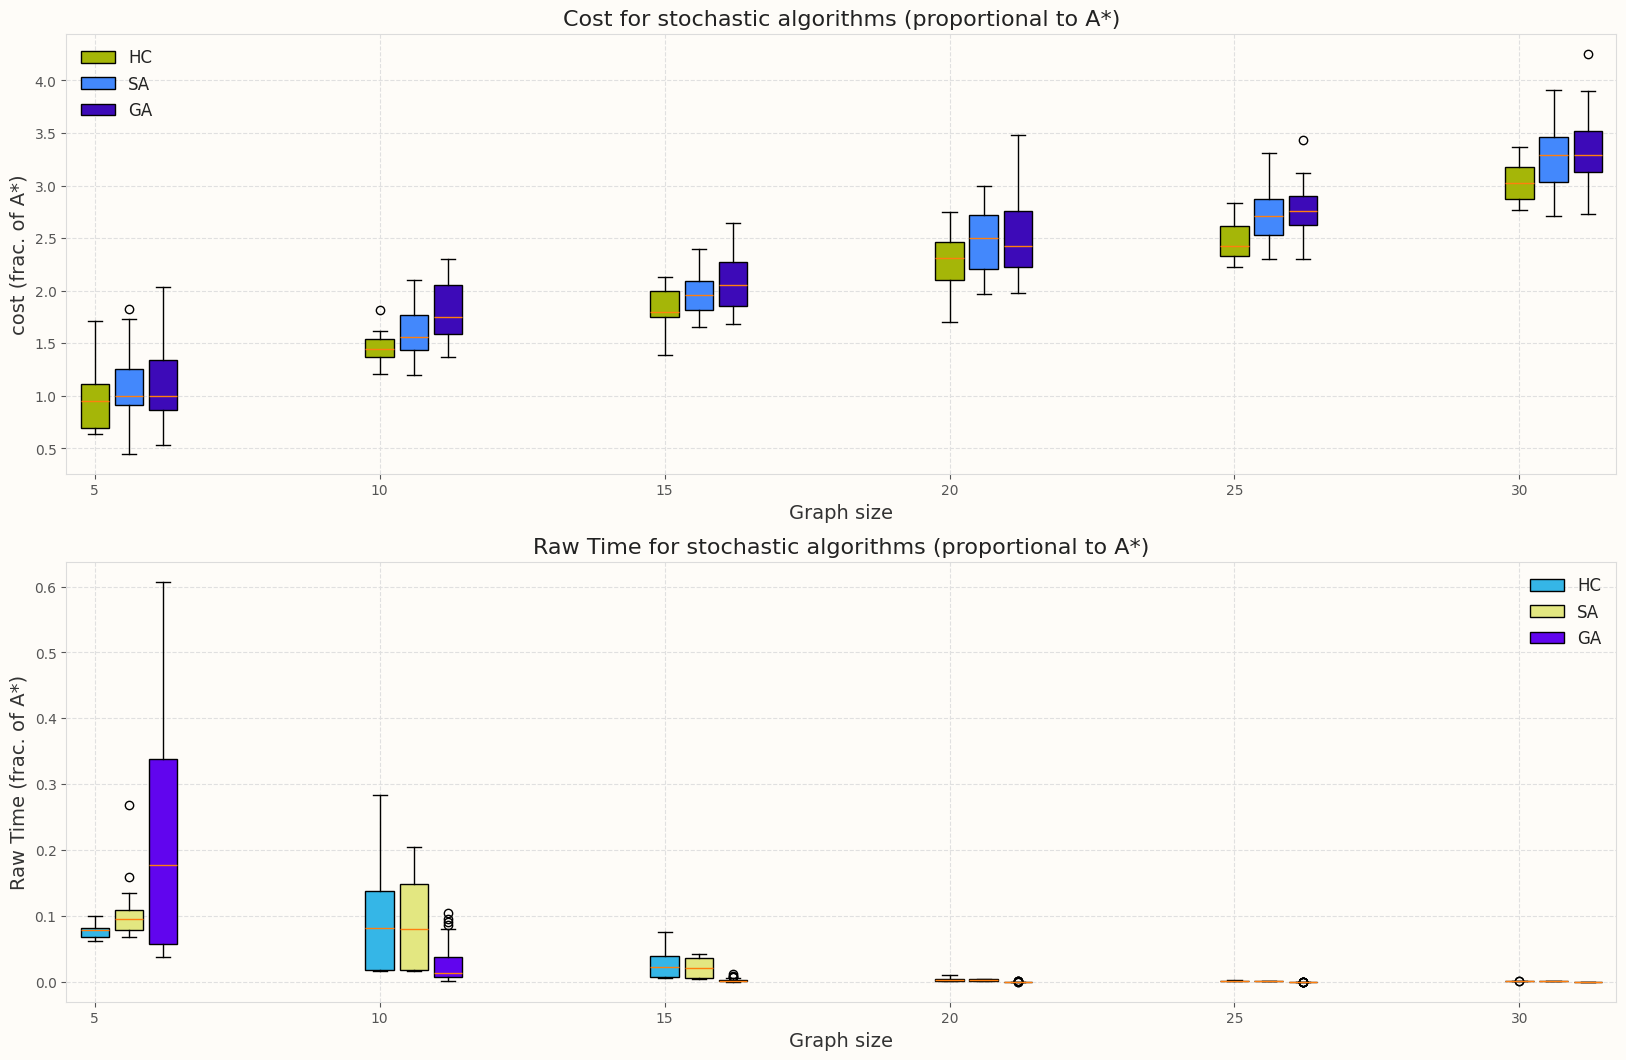

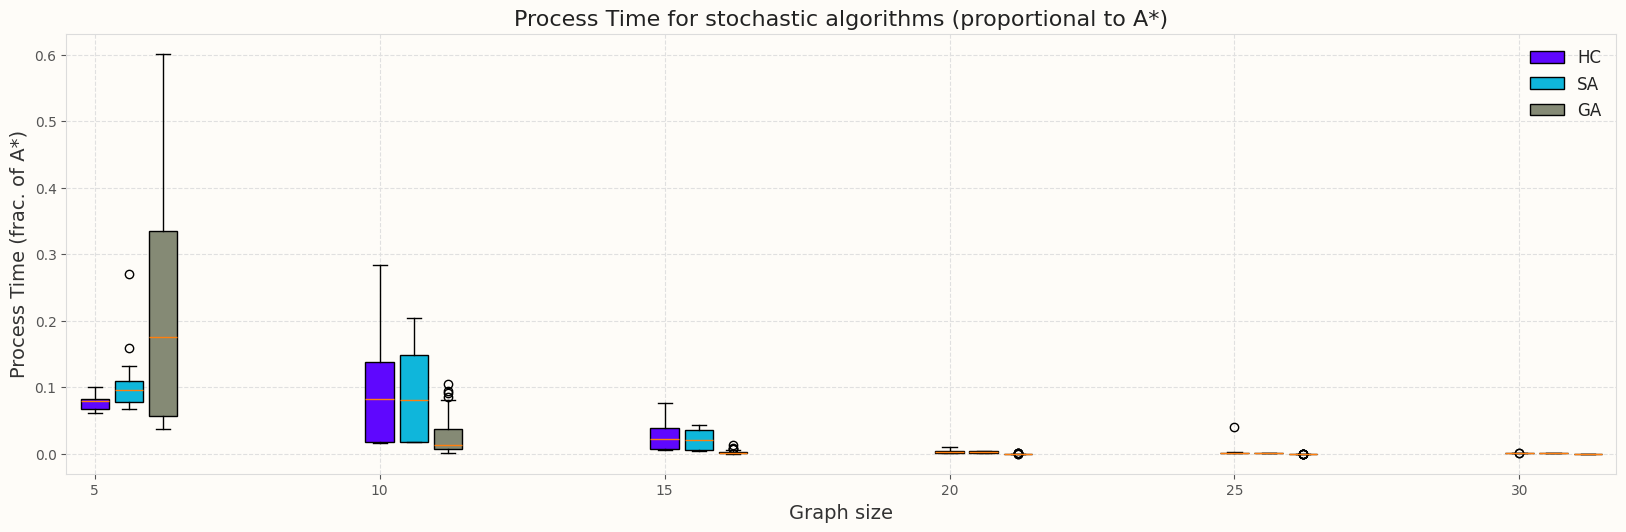

In [102]:
#Comparing to A*

x = len(data); y = 1
idx = 1 

width = 0.5
plt.figure(figsize = [20, 40])

def plotfor(m):
    global idx; global x; global y; global width

    measure = m
    if measure != 'sizes' and measure != 'argset' and measure != 'iterdata':
        plt.subplot(x, y, idx)
        title = measure[0].upper() + measure[1:]
        plt.title(f"{title} for stochastic algorithms (proportional to A*)")
        offset = 0

        for alg in data[measure].keys():

            #Formatting for box plot
            d = data[measure][alg]
            plotd = []
            for u in ucities:
                ppc = np.array([ x for x, c in zip(d, data['sizes'][alg]) if c == u ], dtype = 'float')

                #Aligning with the A* measuremnets, since this includes multiple runs of one algo on multiple files
                astard = [ x for x, c in zip(apkg[measure], data['sizes'][alg]) if c == u ]
                diff = int(len(ppc) / len(astard))
                
                for idx in range(len(astard)):
                    ppc[idx*diff : (idx+1)*diff] /= astard[idx]

                plotd.append(ppc)

            plt.boxplot(plotd, positions = ucities + offset, widths = width, label = alg, 
                        patch_artist=True, boxprops=dict(facecolor = np.random.rand(3,)))

            offset += width + 0.1

        plt.xticks(ucities)
        #plt.yscale("log", base = 30)
        plt.xlabel("Graph size")
        plt.ylabel(measure + " (frac. of A*)")
        plt.legend()
        idx += 1

plotfor("cost"); plotfor("Raw Time"); 
plt.show()

plt.figure(figsize = [20, 40])
plotfor("Process Time")
plt.show()

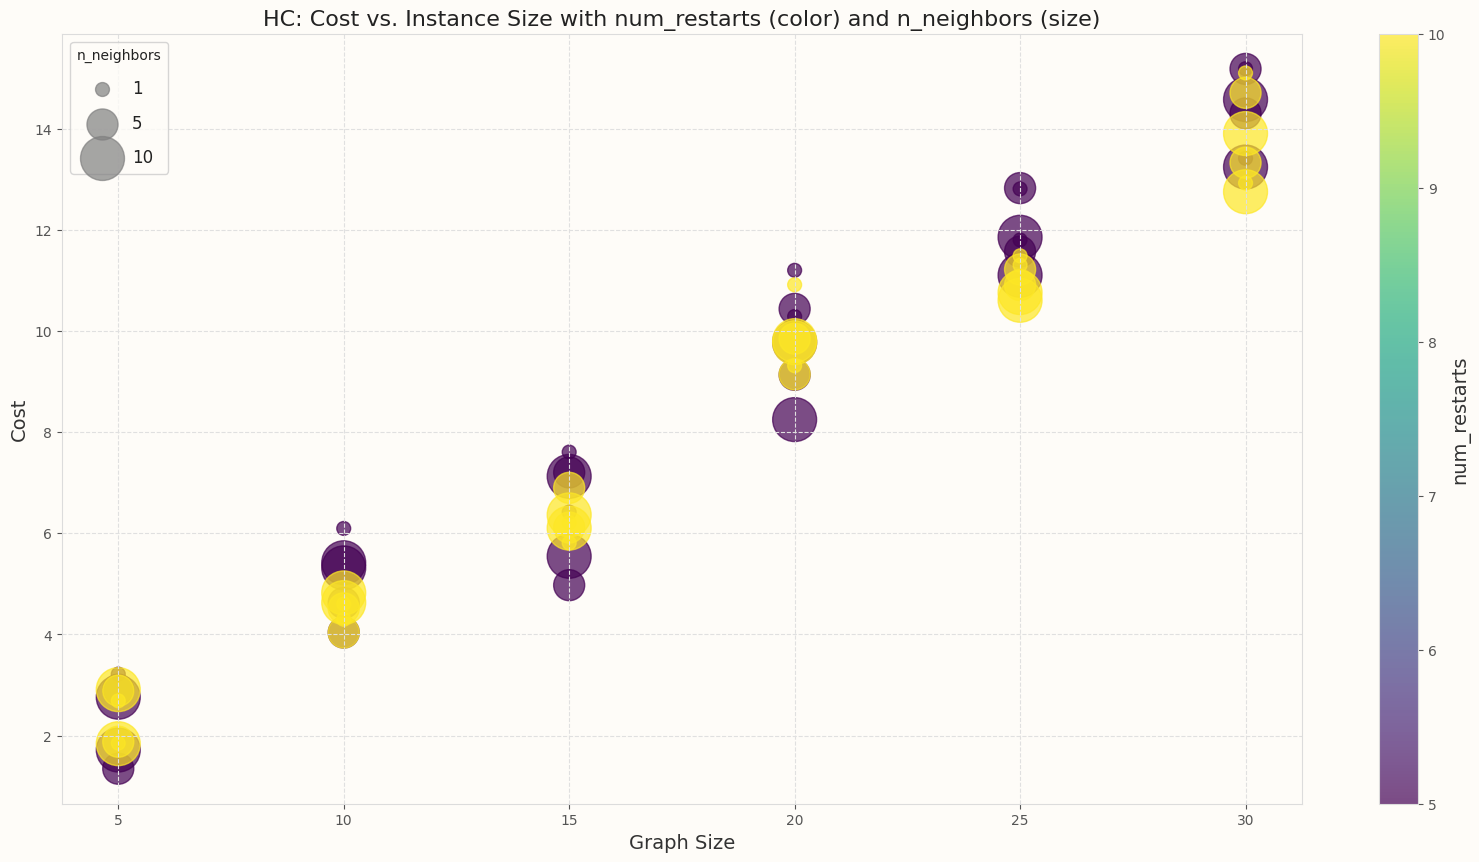

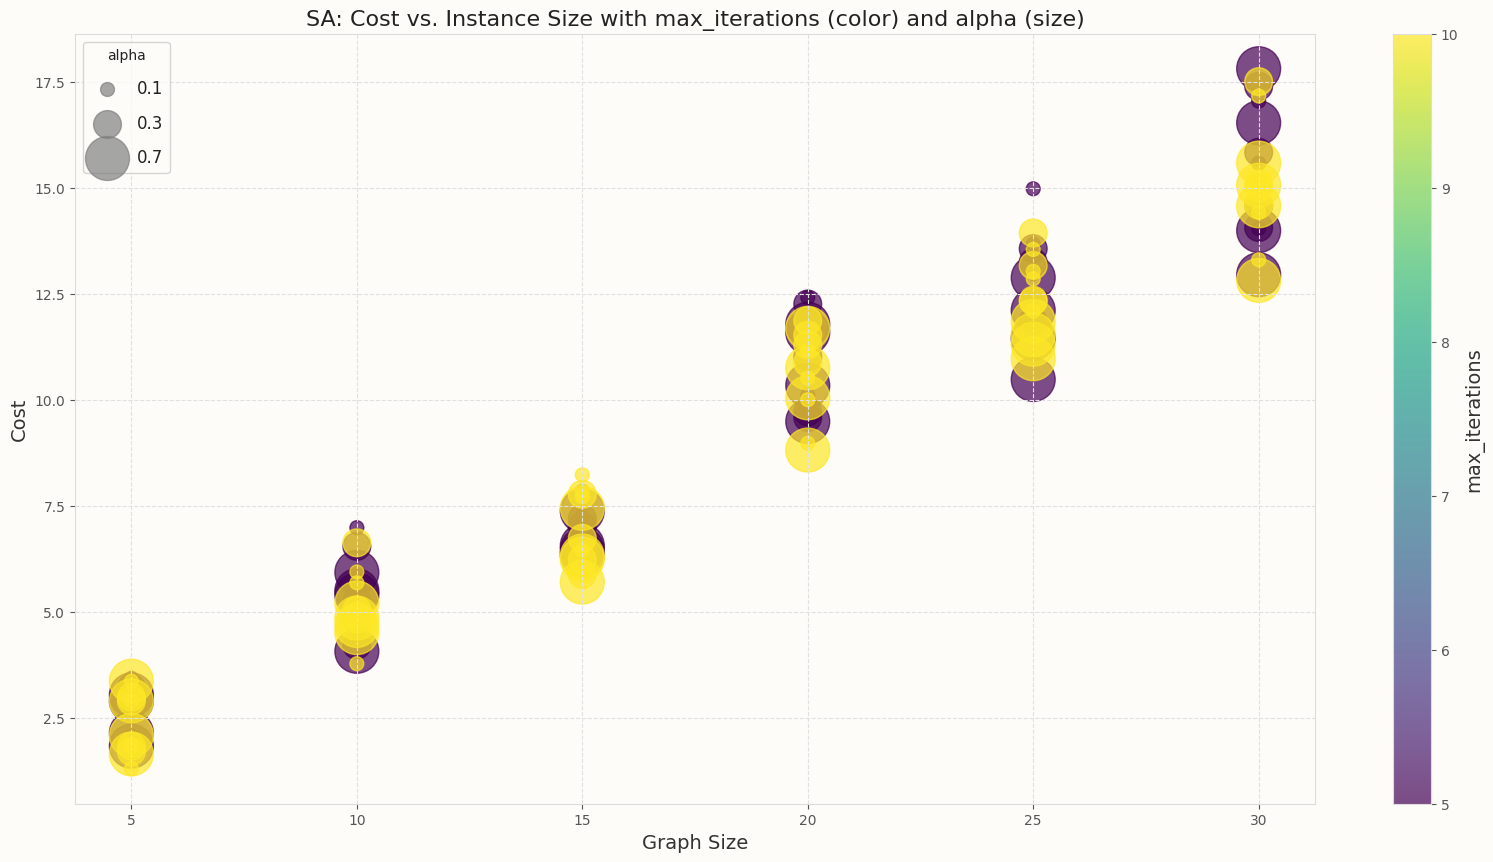

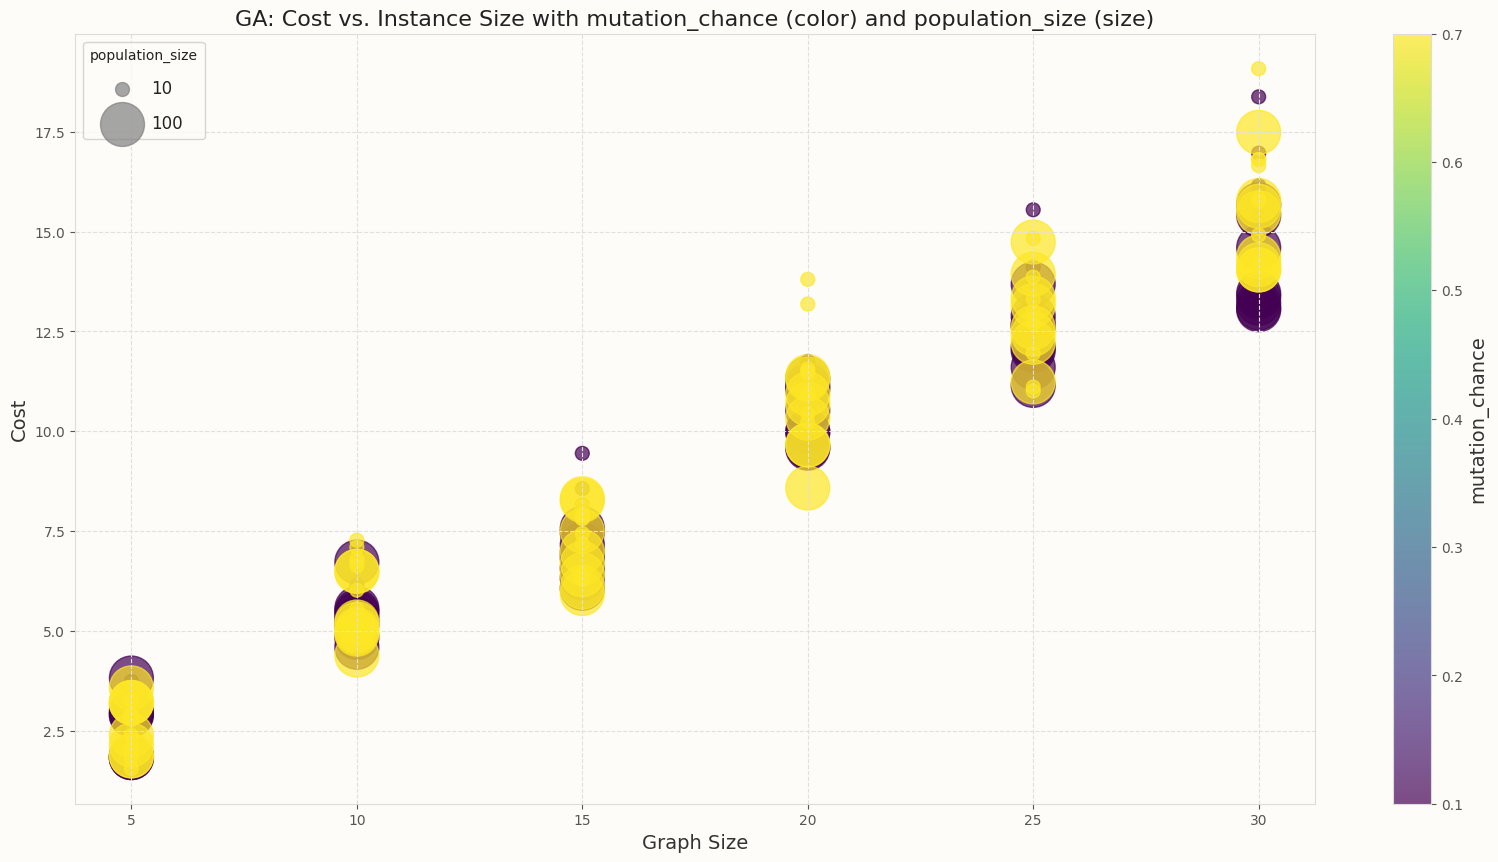

In [103]:
for alg in data['argset'].keys():
    kcolor = list(data['argset'][alg][0].keys())[0]
    ksize = list(data['argset'][alg][0].keys())[1]

    colors = [x[kcolor] for x in data['argset'][alg]]
    sizes_raw = [x[ksize] for x in data['argset'][alg]]

    min_size, max_size = 100, 1000
    unique_sizes = sorted(set(sizes_raw))
    size_mapping = {val: np.interp(val, [min(unique_sizes), max(unique_sizes)], [min_size, max_size]) for val in unique_sizes}
    sizes = [size_mapping[val] for val in sizes_raw]

    plt.figure(figsize=[20, 10])
    sc = plt.scatter(data['sizes'][alg], data['cost'][alg], 
                     c=colors, s=sizes, cmap='viridis', alpha=0.7)
    
    plt.xlabel('Graph Size')
    plt.ylabel('Cost')
    plt.title(f"{alg}: Cost vs. Instance Size with {kcolor} (color) and {ksize} (size)")

    cbar = plt.colorbar(sc)
    cbar.set_label(kcolor)

    for val in unique_sizes:
        plt.scatter([], [], c='gray', alpha=0.7, s=size_mapping[val], label=str(val))
    plt.legend(title=ksize, scatterpoints=1, frameon=True, labelspacing=1, loc='best')

    plt.show()

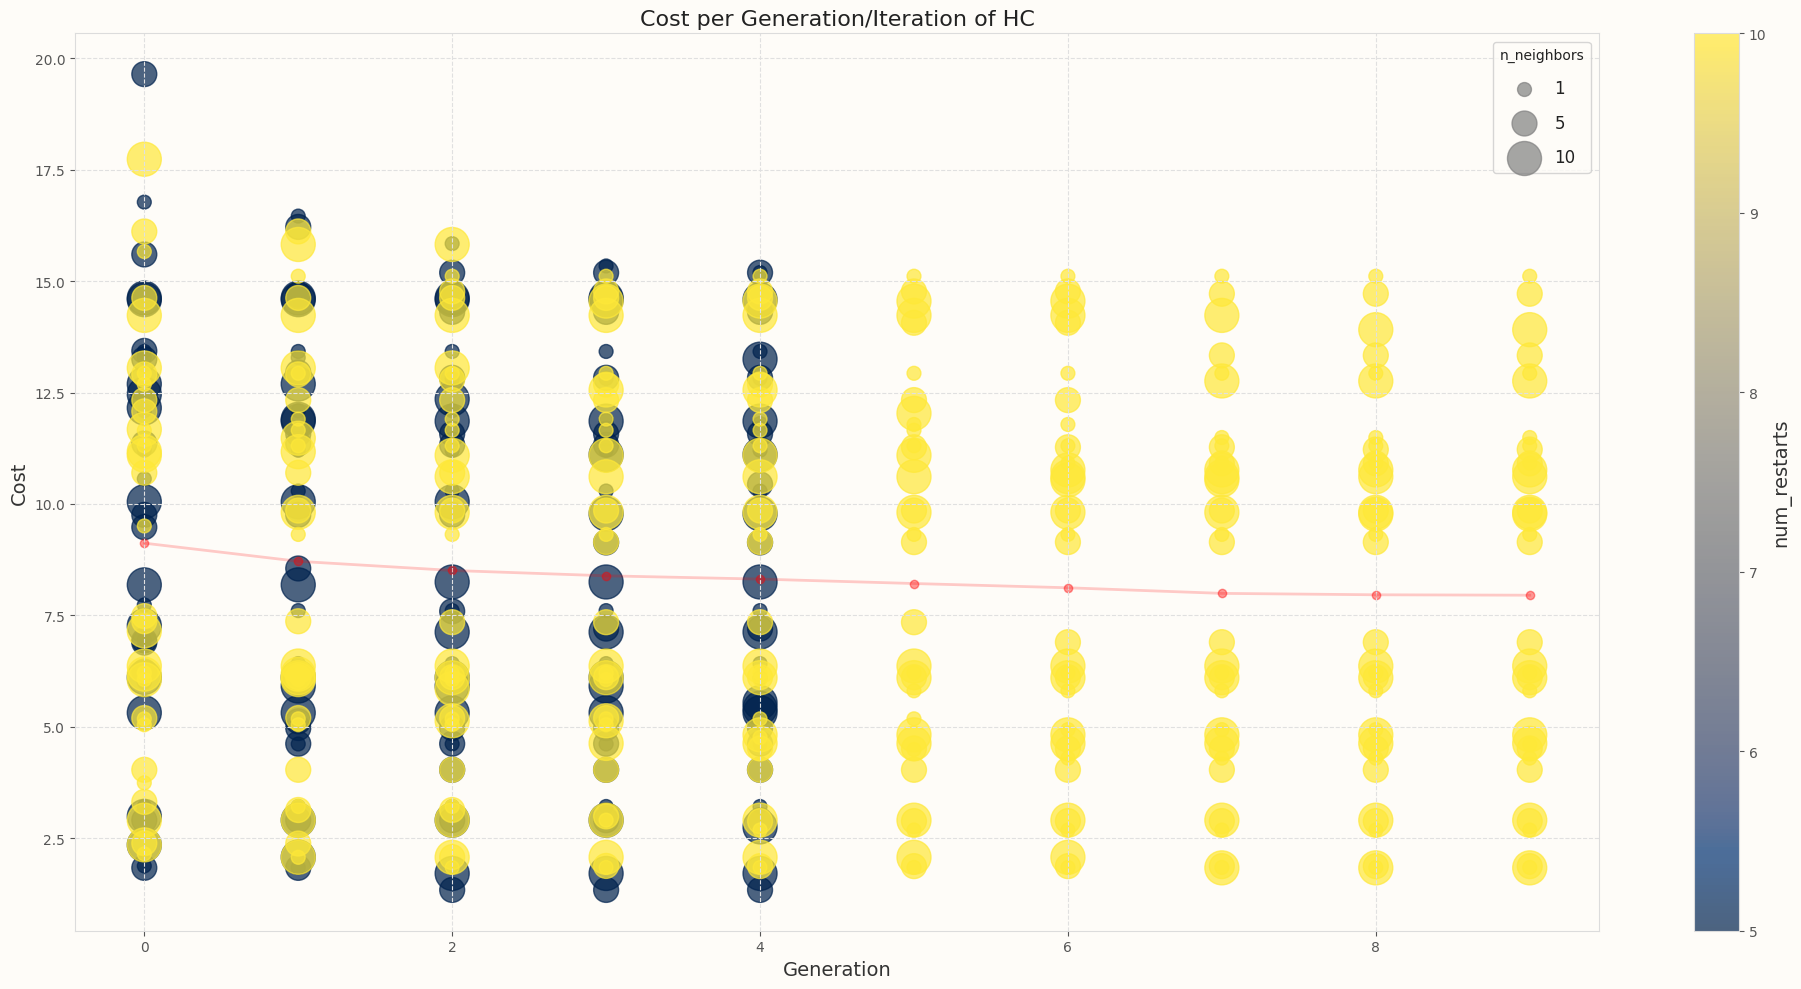

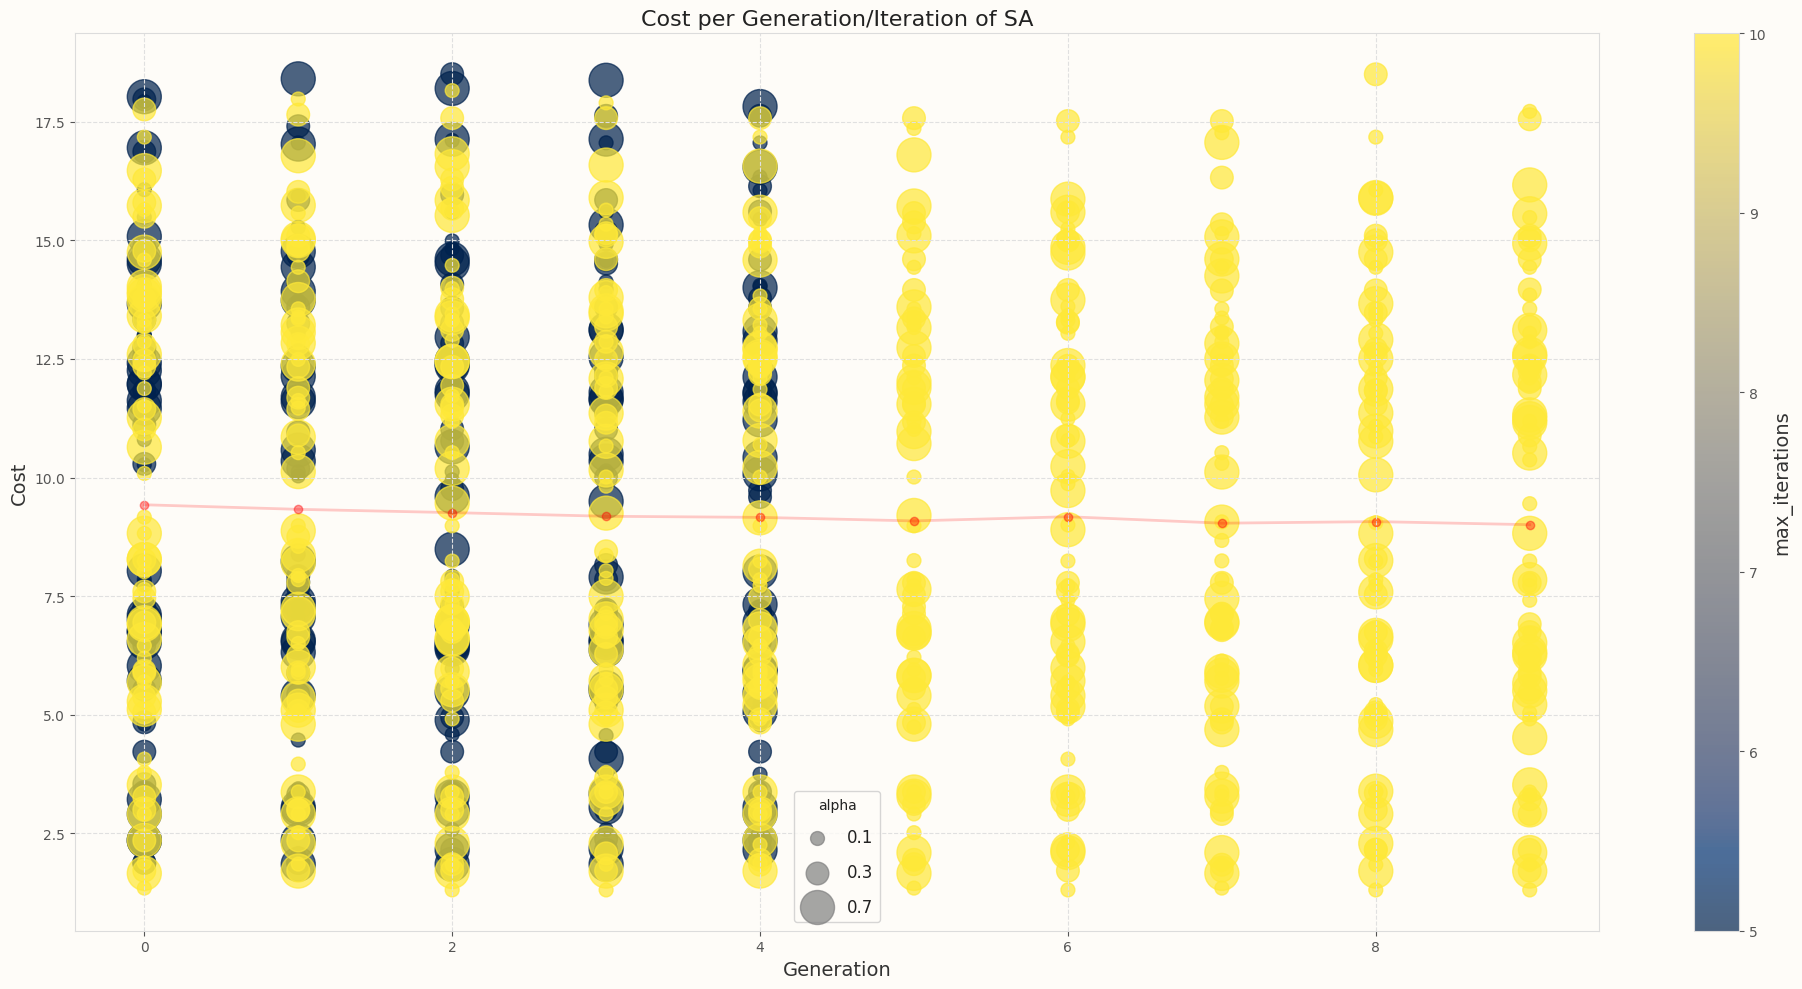

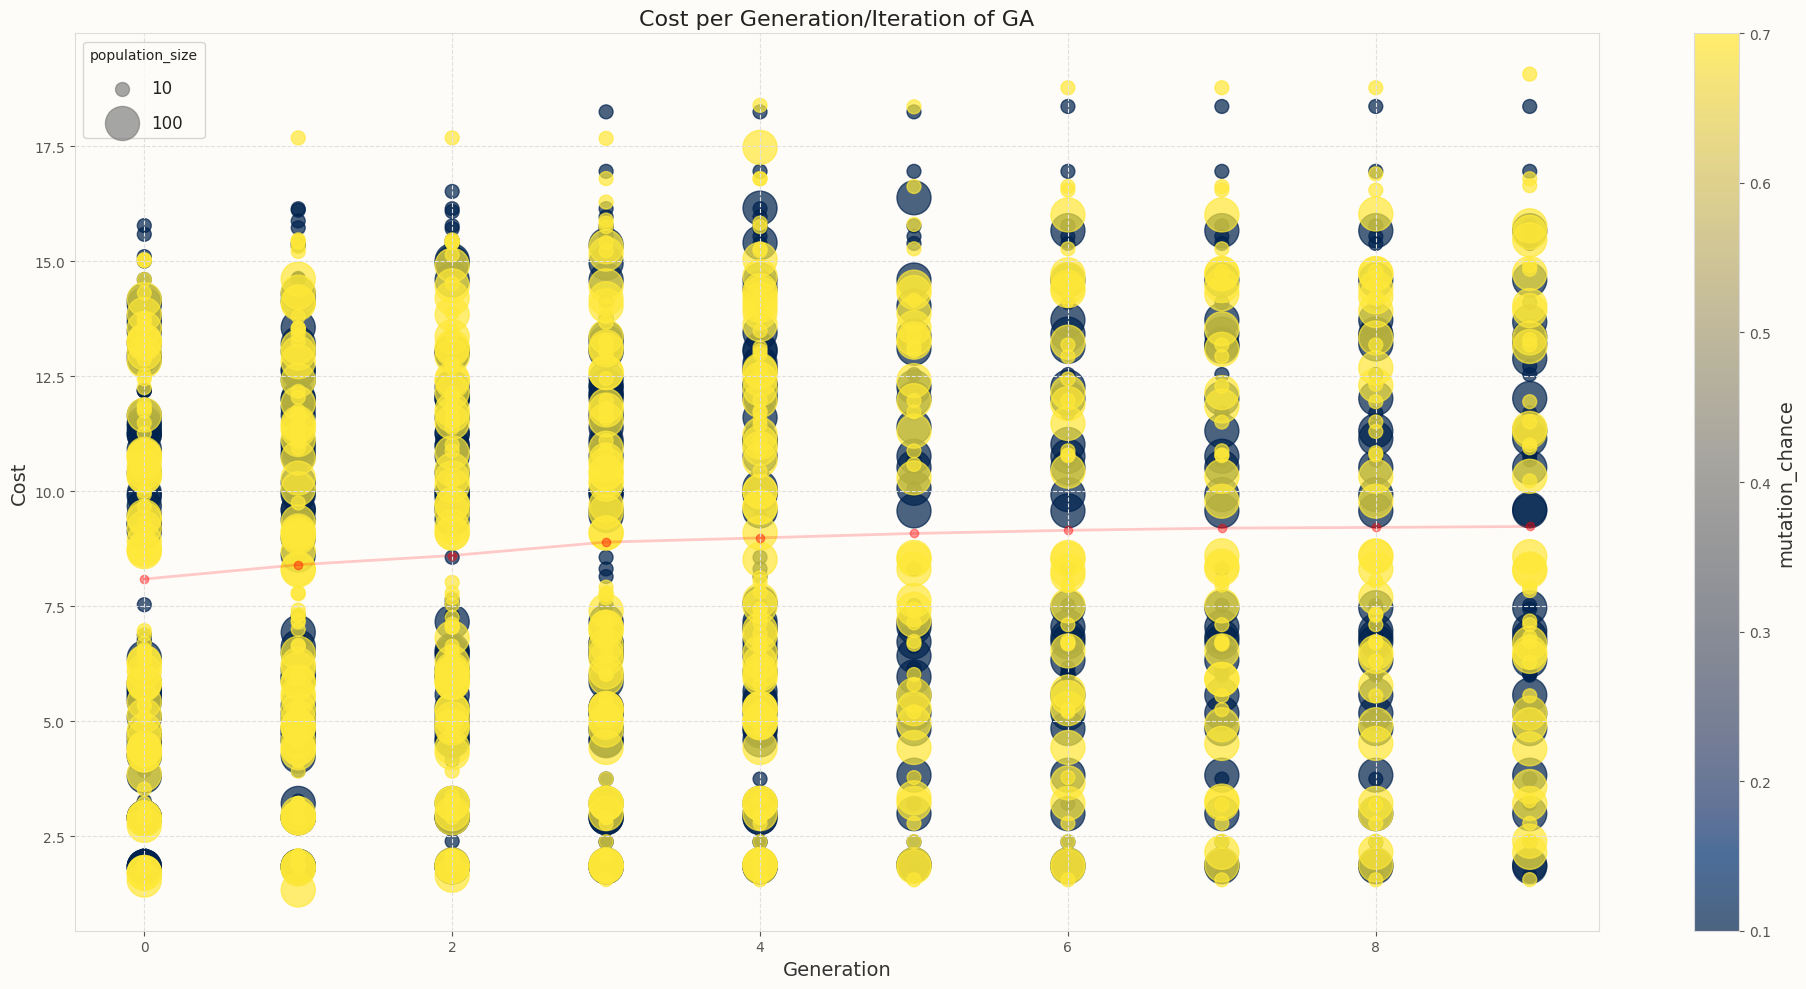

In [112]:
#Iterdata

data['iterdata']

for alg in data['iterdata']:
    plt.figure(figsize = [20, 10])

    kcolor = list(data['argset'][alg][0].keys())[0]
    ksize = list(data['argset'][alg][0].keys())[1]
    #print(kcolor, ksize)
    
    X = []
    Y = []
    color = []
    size = []

    for idata, adata in zip(data['iterdata'][alg], data['argset'][alg]):
        for iternum, itercost in idata:
            X.append(iternum)
            Y.append(itercost)

            color.append(adata[kcolor])
            size.append(adata[ksize])
        
    #Scatter for everything
    min_size, max_size = 100, 600
    size_scaled = min_size + (size - np.min(size)) / (np.max(size) - np.min(size)) * (max_size - min_size)
    sc = plt.scatter(X, Y, c=color, s=size_scaled, cmap='cividis', alpha=0.7)

    #Opaq line showing medians changing over time 
    ux = np.unique(X)
    uy = []
    for uniq in ux:
        l = []
        for x, y in zip(X, Y):
            if x == uniq:
                l.append(y)
        uy.append(np.mean(l))

    plt.plot(ux, uy, c = 'red', alpha = 0.2)
    plt.scatter(ux, uy, color = 'red', alpha = 0.4)

    cbar = plt.colorbar(sc)
    cbar.set_label(kcolor)

    sizes_raw = [x[ksize] for x in data['argset'][alg]]
    unique_sizes = sorted(set(sizes_raw))
    size_mapping = {val: np.interp(val, [min(unique_sizes), max(unique_sizes)], [min_size, max_size]) for val in unique_sizes}
    sizes = [size_mapping[val] for val in sizes_raw]

    for val in unique_sizes:
        plt.scatter([], [], c='gray', alpha=0.7, s=size_mapping[val], label=str(val))
    plt.legend(title=ksize, scatterpoints=1, frameon=True, labelspacing=1, loc='best')
    
    plt.xlabel('Generation')
    plt.ylabel('Cost')
    plt.title(f"Cost per Generation/Iteration of {alg}")

    plt.tight_layout()
    plt.show()

In [105]:
data['argset']['HC'][0]

{'num_restarts': 5, 'n_neighbors': 1}

In [106]:
data['iterdata']['HC'][0]

[(0, np.float64(13.28426167628512)),
 (1, np.float64(13.28426167628512)),
 (2, 12.81453406190265),
 (3, 12.81453406190265),
 (4, 12.81453406190265)]